### Importing Libraries

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score,confusion_matrix
import joblib

### Importing Dataset

In [57]:
df=pd.read_csv("predictive_maintenance.csv")

### Printing Columns

In [58]:
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')


### Printing Top 5 Data

In [59]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


### Printing Last 5 Data

In [60]:
df.tail(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


### Printing Information Regarding Data

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


### Printing Description(Mathematical) Of Data

In [62]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


### Handling Null Values

In [63]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

##### As no Null Values So let's Check Duplicate Values

### Duplicate Value Handling

In [64]:
df.duplicated().sum()

np.int64(0)

##### Therefore no duplicate Values

### Dropping Unwanted Columns

In [65]:
df=df.drop(["Product ID","Type","Failure Type","UDI"],axis=1)
print(df)

      Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                    1551   
1                   298.2                    308.7                    1408   
2                   298.1                    308.5                    1498   
3                   298.2                    308.6                    1433   
4                   298.2                    308.7                    1408   
...                   ...                      ...                     ...   
9995                298.8                    308.4                    1604   
9996                298.9                    308.4                    1632   
9997                299.0                    308.6                    1645   
9998                299.0                    308.7                    1408   
9999                299.0                    308.7                    1500   

      Torque [Nm]  Tool wear [min]  Target  
0            42.8 

### Understanding Target Column Through Heatmap

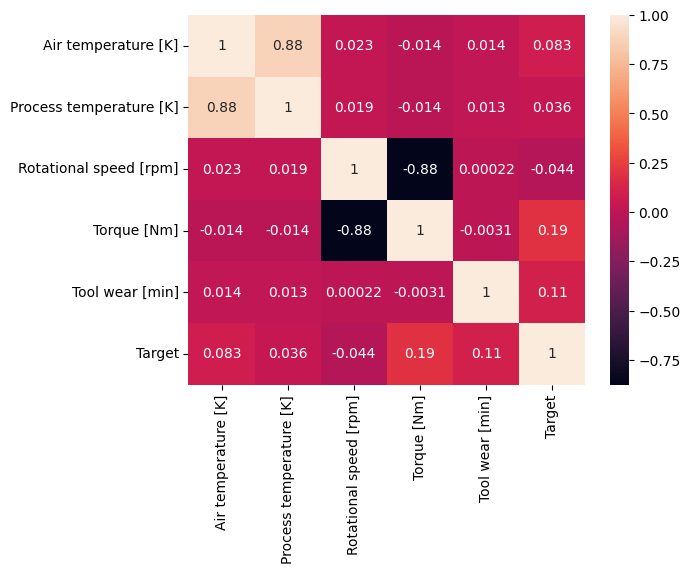

In [66]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

### Seperating Target And Features

In [67]:
features=df.drop(columns=["Target"])
target=df["Target"]

### Train Test Split Test

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2,random_state=42)

### Scaling Data(Optional In This Case)

In [69]:
scaler = StandardScaler()
x_scaled_train=scaler.fit_transform(X_train)
x_scaled_test=scaler.fit_transform(X_test)

### Selecting Model

In [70]:
Model=RandomForestClassifier(n_estimators=100,random_state=42)

### Training Data

In [71]:
Model.fit(x_scaled_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Testing Data

In [72]:
Y_pred=Model.predict(x_scaled_test)

### Measuring Accuracy Of Model

In [73]:
accu_score=accuracy_score(Y_pred,Y_test)*100
print(accu_score)

98.55000000000001


### Measuring Recall Score(how many of the actual positive cases our model correctly identified)

In [74]:
rec_score=recall_score(Y_pred,Y_test)*100
print(rec_score)

86.36363636363636


### Confusion Matrix(where our classification model got things right or wrong)

In [75]:
con_mat=confusion_matrix(Y_pred,Y_test)
print(con_mat)

[[1933   23]
 [   6   38]]


##### Better Visualisation

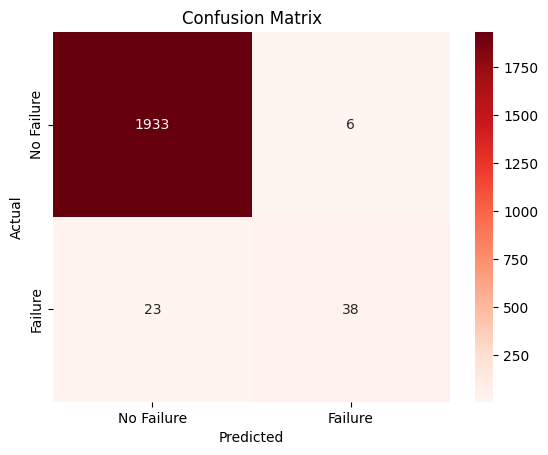

In [76]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["No Failure", "Failure"],
            yticklabels=["No Failure", "Failure"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


### Loading Prediction Dataset

In [77]:
df2=pd.read_csv("test_dataset.csv")

### Printing Columns

In [78]:
print(df2.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')


### Dropping columns which were Dropped in Original Dataset

In [79]:
df2=df2.drop(["Product ID","Type","Failure Type","UDI","Target"],axis=1)

### Printing First 5 Data

In [80]:
df2.head(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,297.7,308.2,1334,53.0,156
1,295.6,306.2,1446,49.9,133
2,299.2,308.5,1490,43.2,158
3,300.7,310.3,1533,35.6,198
4,299.1,308.3,1305,61.4,17


### Printing Last 5 Data

In [81]:
df2.tail(5)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
1995,296.4,307.5,1596,35.1,75
1996,300.6,309.4,1410,40.6,99
1997,299.6,311.1,1649,33.8,133
1998,299.6,309.0,1525,42.8,160
1999,301.7,311.0,1343,49.2,25


### Analysing The Mathematical Expectations Of Dataset

In [82]:
df2.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,300.059950,310.053150,1538.266000,40.089900,110.876000
std,1.958021,1.445114,179.757438,10.019576,62.966737
min,295.400000,305.800000,1168.000000,4.600000,0.000000
25%,298.400000,308.900000,1423.000000,33.300000,57.000000
50%,300.100000,310.100000,1502.000000,40.300000,112.000000
75%,301.600000,311.100000,1614.000000,46.900000,165.000000
max,304.400000,313.700000,2861.000000,71.800000,246.000000


### Handling Null Values

In [83]:
df2.isnull().sum()

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
dtype: int64

##### As no null values now will look at duplicated one's

### Handling Duplicate Values

In [84]:
df2.duplicated().sum()

np.int64(0)

##### Therefore No Duplicate Vlaues

### Scaling Data(Optional In This Case)

In [85]:
new_scaled_data=scaler.transform(df2)

### Making Predictions

In [86]:
predict=Model.predict(new_scaled_data)

### Adding New Column Prediction_Made in Dataframe and Storing New Dataframe Into CSV Format

In [92]:
df2["Prediction_Made"] = predict
result["Prediction_Made"] = result["Prediction_Made"].map({0: "No Failure", 1: "Failure"})
df2.to_csv("Predicted_Data.csv", index=False)

### Saving Our Model

In [93]:
joblib.dump(Model, "my_model.pkl")
joblib.dump(scaler, "my_scaler.pkl")

['my_scaler.pkl']

### End